# Medical Cost Personal Insurance Project

# 1. Introduction

Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns   

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, 

objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


# 2. Data Cleaning

# Import important library :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor

In [3]:
df=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


From the snapshot provided above, it's evident that the dataset comprises three numerical columns and three categorical columns, with "expenses" serving as our predictor variable.

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#to see the random sample in the dataset
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
316,50,male,32.205,0,no,northwest,8835.26495
663,18,male,33.660,0,no,southeast,1136.39940
661,57,female,23.980,1,no,southeast,22192.43711
753,58,female,22.770,0,no,southeast,11833.78230
533,37,male,36.190,0,no,southeast,19214.70553


In [7]:
df[650:670]

,age,sex,bmi,children,smoker,region,charges
650,49,female,42.680,2,no,southeast,9800.88820
651,53,female,39.600,1,no,southeast,10579.71100
652,48,female,31.130,0,no,southeast,8280.62270
653,45,female,36.300,2,no,southeast,8527.53200
654,59,female,35.200,0,no,southeast,12244.53100
655,52,female,25.300,2,yes,southeast,24667.41900
656,26,female,42.400,1,no,southwest,3410.32400
657,27,male,33.155,2,no,northwest,4058.71245
658,48,female,35.910,1,no,northeast,26392.26029
659,57,female,28.785,4,no,northeast,14394.39815


In [8]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory Data Analysis (EDA)

In [9]:
df.shape

(1338, 7)

The dataset comprises a total of 1338 rows and 7 columns.

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values were found in any columns of our dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The dataset contains 1338 rows and 7 columns, the different data types of the columns(float64(2), int64(2), object(3)) and no null values.

In [13]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


his gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can observe the following:-

1.The counts of all the columns are same which means there are no missing values in the dataset.

2.In each feature, we notice that the mean and median are almost equal.

The BMI categories according to the World Health Organization (WHO) are:

Underweight: BMI less than 18.5

Normal weight: BMI 18.5–24.9

Overweight: BMI 25–29.9

Obesity: BMI 30 or greater

In [14]:
BMI=df['bmi']>=30.0
BMI.value_counts()

True     707
False    631
Name: bmi, dtype: int64

Given the average BMI of people is 30, it indicates that approximately 707 people in the dataset are obese.

In [15]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Based on the results from the describe method, the variables that are more frequent in the dataset are:
- Male gender
- Non-smokers
- Southeast region

In [16]:
df.skew()# Acceptable range of skewness typically falls between -0.5 and 0.5.

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Age: 0.055673 (Approximately symmetric distribution)

BMI: 0.284047 (Slightly right-skewed distribution)

Children: 0.938380 (Moderately right-skewed distribution)

Charges: 1.515880 (Highly right-skewed distribution)

In [17]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

,no.of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [18]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('/n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
/n
male      676
female    662
Name: sex, dtype: int64
/n
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
/n
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
/n
no     1064
yes     274
Name: smoker, dtype: int64
/n
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
/n
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.

From the dataset:
- Sex: There are 676 males and 662 females.
- Children: There are 574 records with 0 children, 324 records with 1 child, 240 records with 2 children, 157 records with 3 children, 25 records with 4 children, and 18 records with 5 children.
- Region: There are 364 records from the southeast region, 325 records from the southwest region, 325 records from the northwest region, and 324 records from the northeast region.

In [19]:
df.duplicated().sum()

1

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

We found and removed 1 duplicate value from the dataset.

**Transforming string values within a column into numeric representations.**

In [22]:
# to check the unique values in these feature
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder


# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# gender column
df['sex'] = label_encoder.fit_transform(df['sex'])

# smoker column
df['smoker'] = label_encoder.fit_transform(df['smoker'])

# region column
df['region'] = label_encoder.fit_transform(df['region'])


In [26]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


Now, we have numerical representations of categorical variables stored in new columns.

In [29]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This code will display the number of null values in each feature of the DataFrame.

In [30]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
df.isnull().sum().sum()

0

<Axes: >

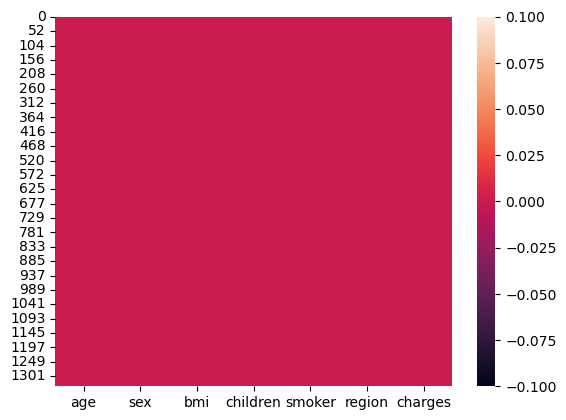

In [32]:
sns.heatmap(df.isnull())

We have no missing values. Looks like we are ready to explore the data visually.

# 3. Data Visualization

# Histogram

**We will create a histogram to visually represent the distribution of the data within the dataset's columns containing continuous values.**

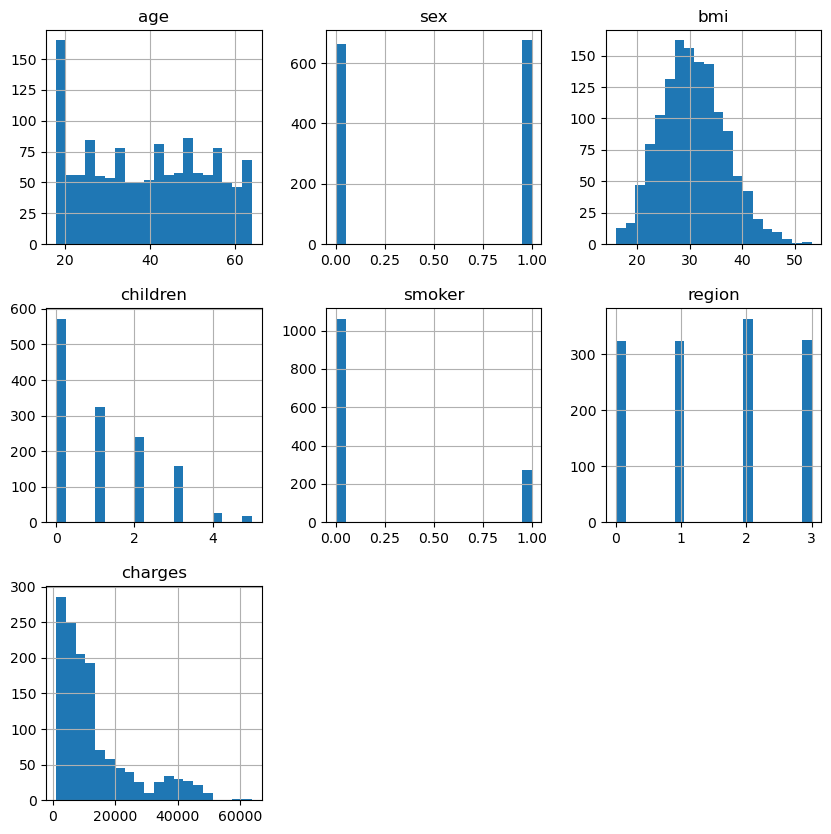

In [33]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

Key observations include:
- Age, region, and BMI exhibit a normal distribution.
- Sex and smoker are binary columns.
- Majority of charges fall below 20000.

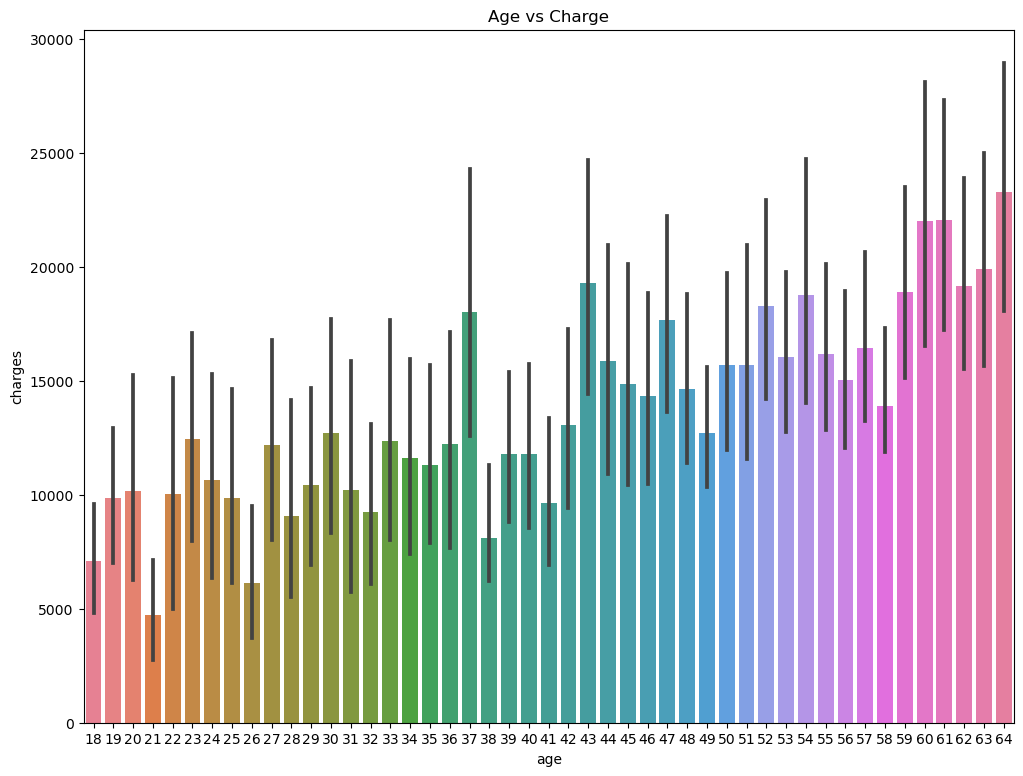

In [34]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl')
plt.show()

We observe that as age increases, insurance premium charges also increase.

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

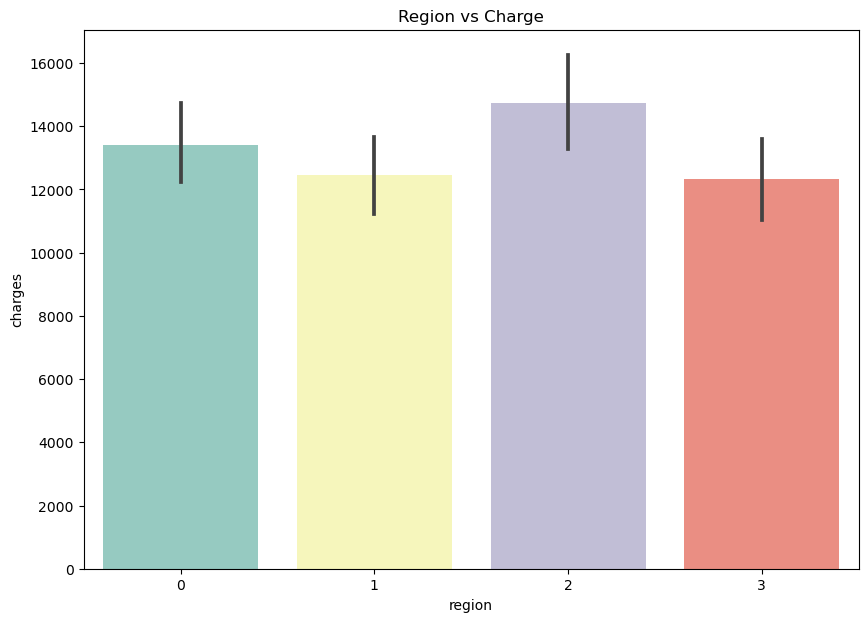

In [35]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df,palette='Set3')

In summary, the Southeast region has the highest medical charges, while the Southwest region has the lowest.No significant difference was found between region and charges.

Text(0.5, 1.0, 'BMI VS Charge for sex')

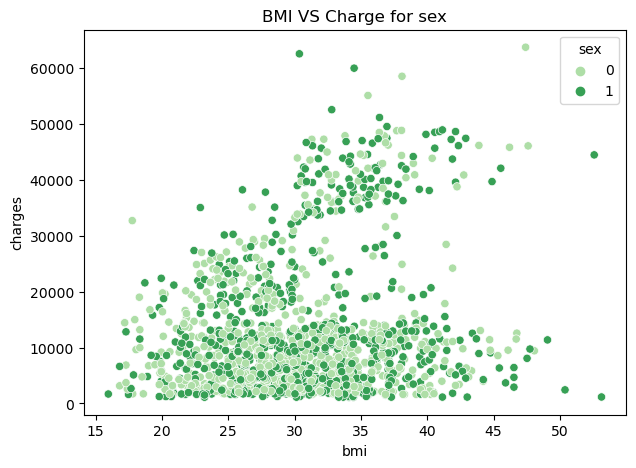

In [36]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Greens')
plt.title('BMI VS Charge for sex')

Text(0.5, 1.0, 'BMI VS Charge for smoker')

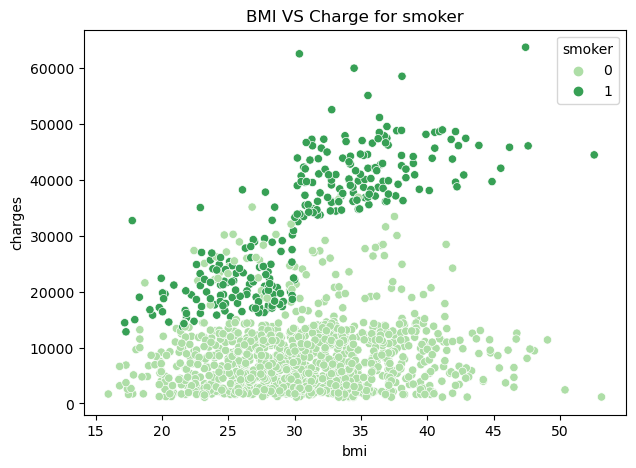

In [37]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=df,palette='Greens')
plt.title('BMI VS Charge for smoker')

In the BMI vs. Charge graph, charges for smokers are higher than for non-smokers.

Text(0.5, 1.0, 'BMI VS Charge for region')

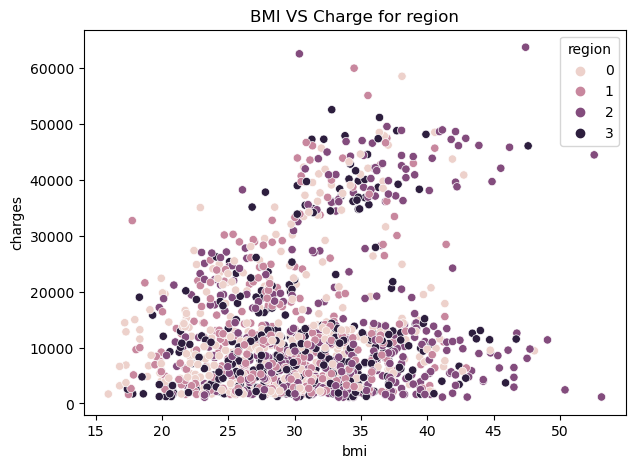

In [38]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='region',data=df)
plt.title('BMI VS Charge for region')

<Axes: title={'center': 'Smoker vs Charge for sex'}, xlabel='smoker', ylabel='charges'>

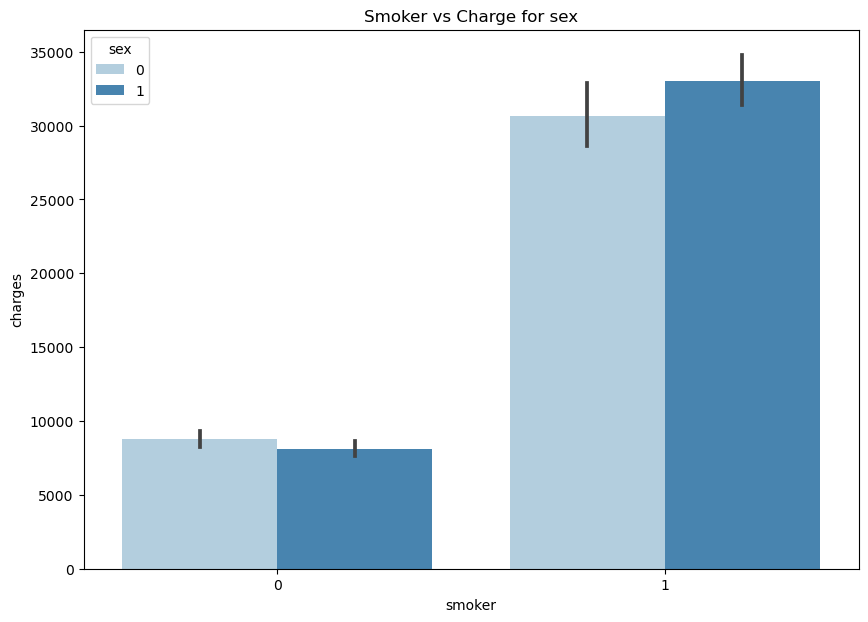

In [39]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge for sex')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')

In the Smoker vs Charge graph, both males and females who smoke have higher insurance premium charges to pay compared to non-smokers.

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

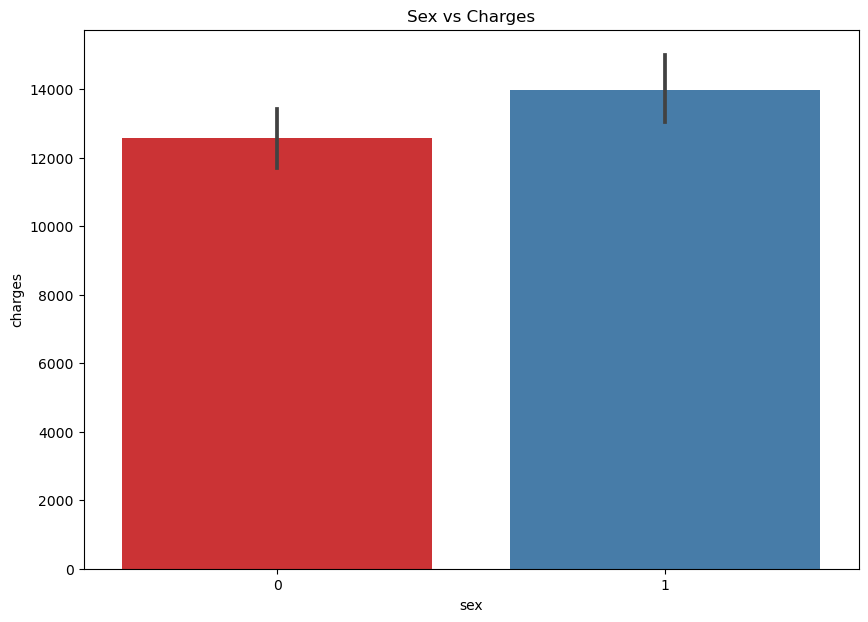

In [40]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df,palette='Set1')

<Axes: title={'center': 'smoker vs Charges'}, xlabel='smoker', ylabel='charges'>

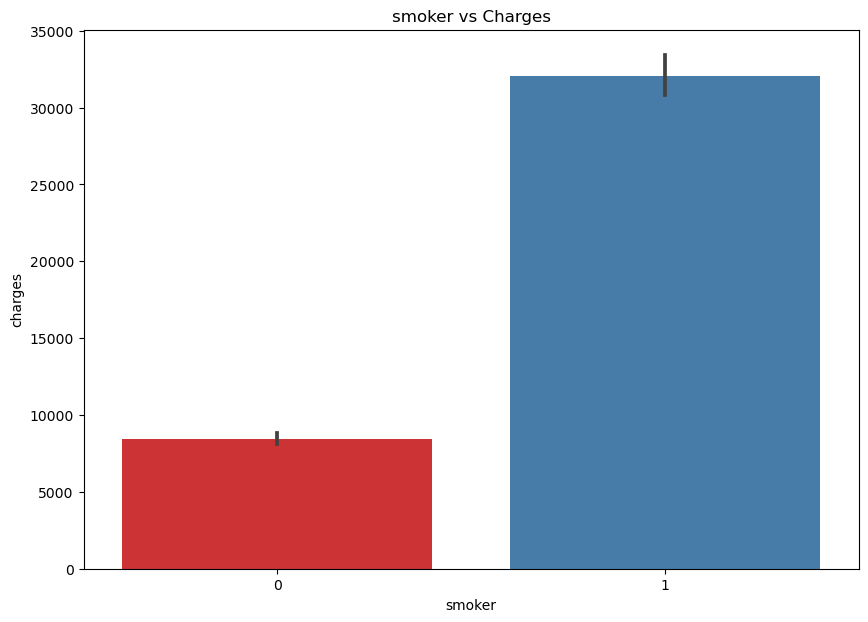

In [41]:
plt.figure(figsize=(10,7))
plt.title('smoker vs Charges')
sns.barplot(x='smoker',y='charges',data=df,palette='Set1')

Confirmed, smokers have higher insurance charges.

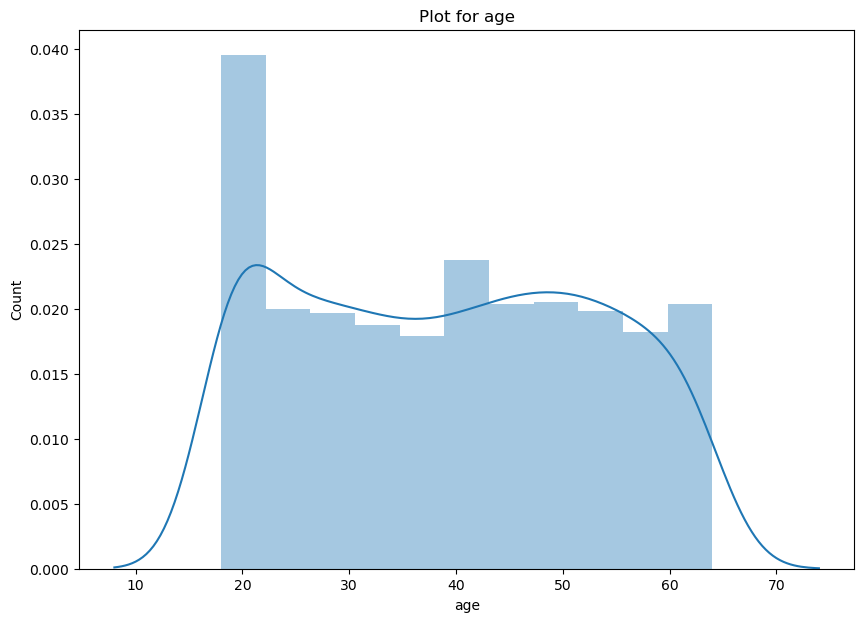

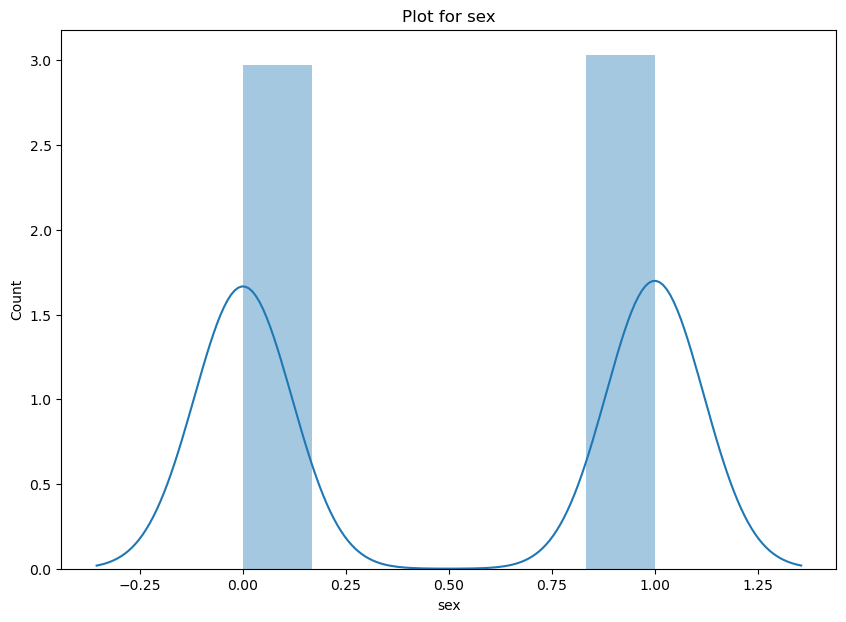

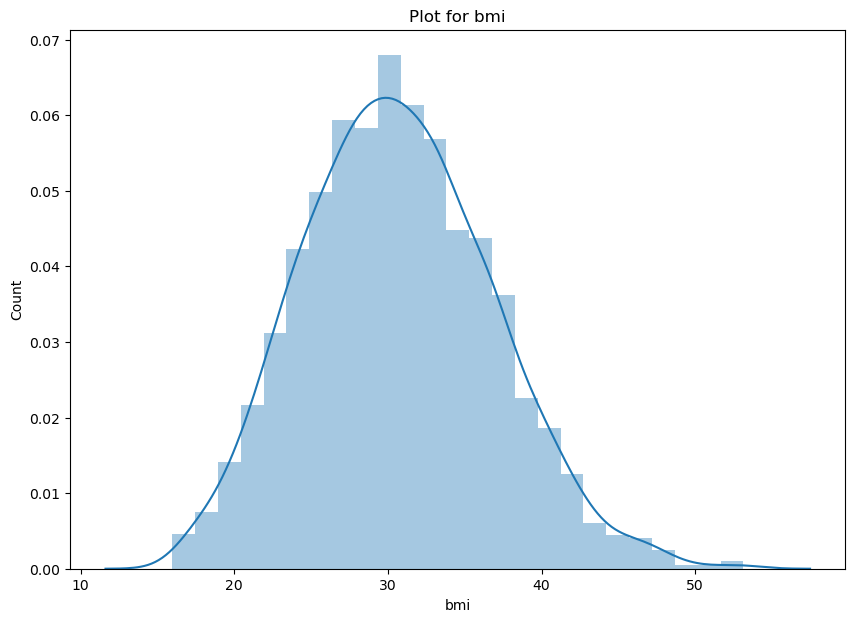

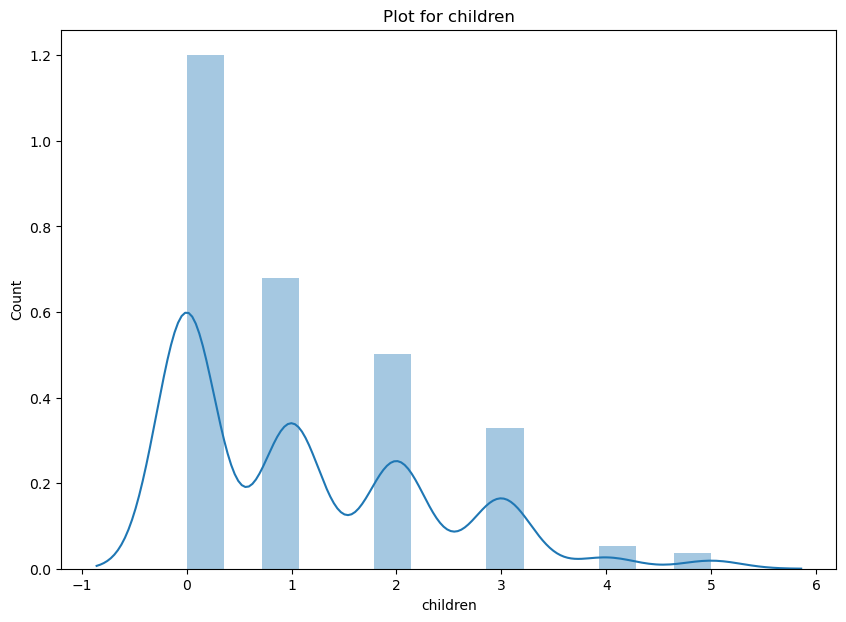

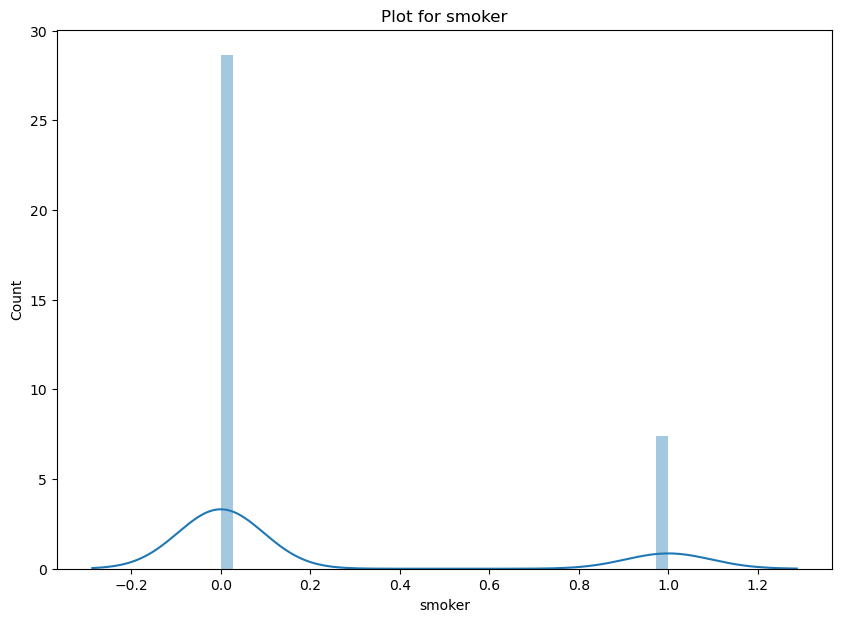

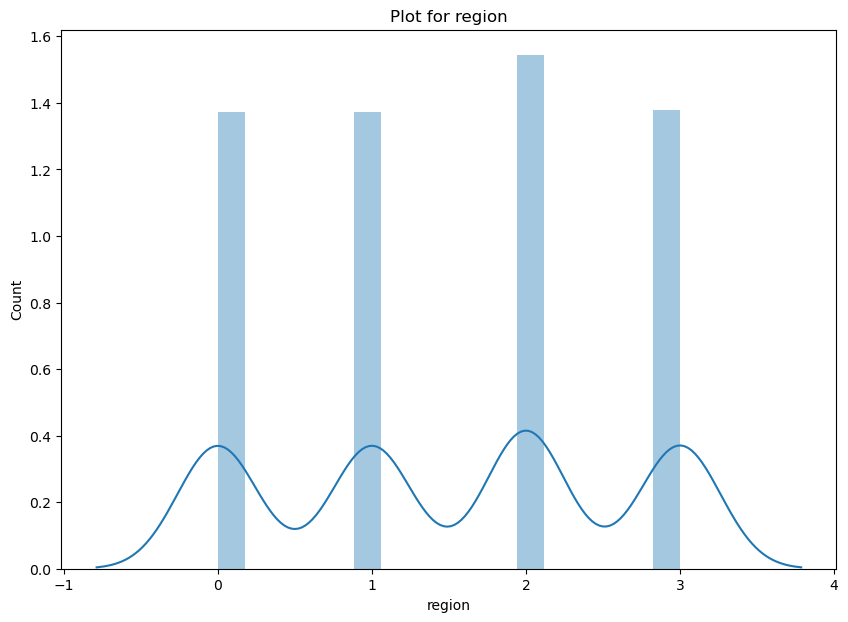

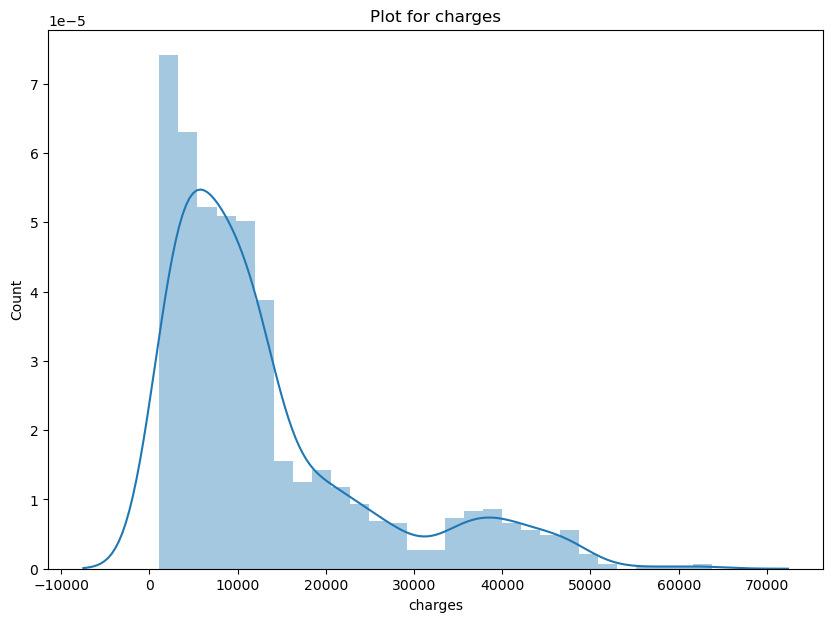

In [42]:

columns = df.columns

for column in columns:
    plt.figure(figsize=(10, 7))
    sns.distplot(df[column])
    plt.title(f'Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


Text(0, 0.5, 'Count')

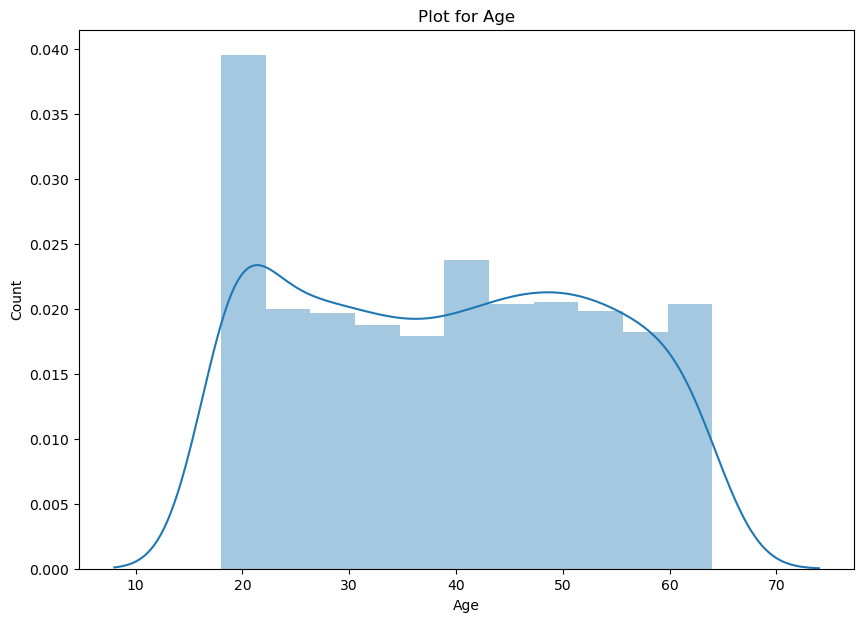

In [43]:
plt.figure(figsize=(10,7))
sns.distplot(df['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

In [44]:
max_=df['age'].max()
min_=df['age'].min()
print('In this dataset, the maximum and minimum age values range from ',min_,'to',max_)

In this dataset, the maximum and minimum age values range from  18 to 64


Text(0, 0.5, 'Count')

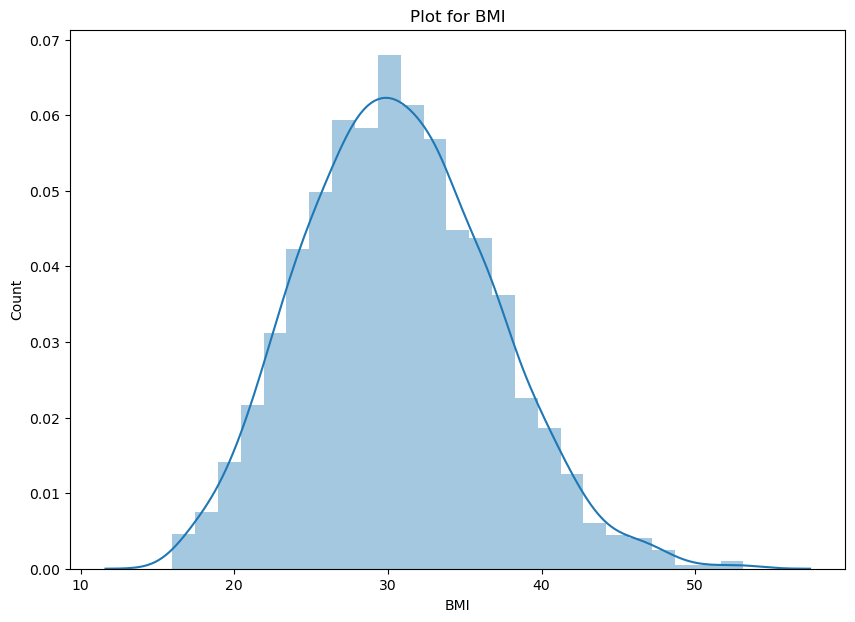

In [45]:
plt.figure(figsize=(10,7))
sns.distplot(df['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

In [46]:
max_=df['bmi'].max()
min_=df['bmi'].min()
print('In this dataset, the maximum and minimum bmi values range from ',min_,'to',max_)

In this dataset, the maximum and minimum bmi values range from  15.96 to 53.13


# pairplot

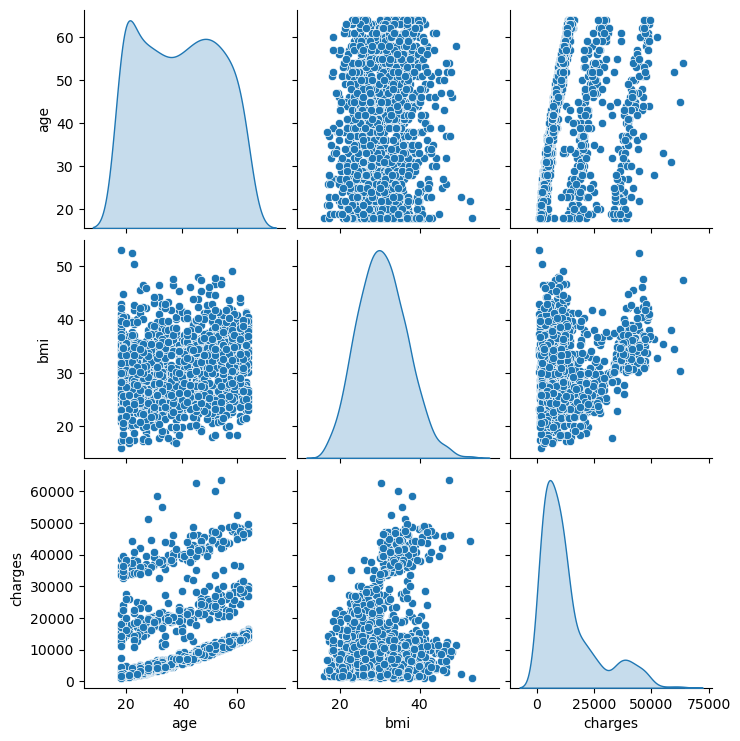

In [47]:
# Pairplot for Age, BMI, Charges
df_num = df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()

The pairplot indicates a linear relationship between age and BMI with charges.

# Barplot

In [48]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)

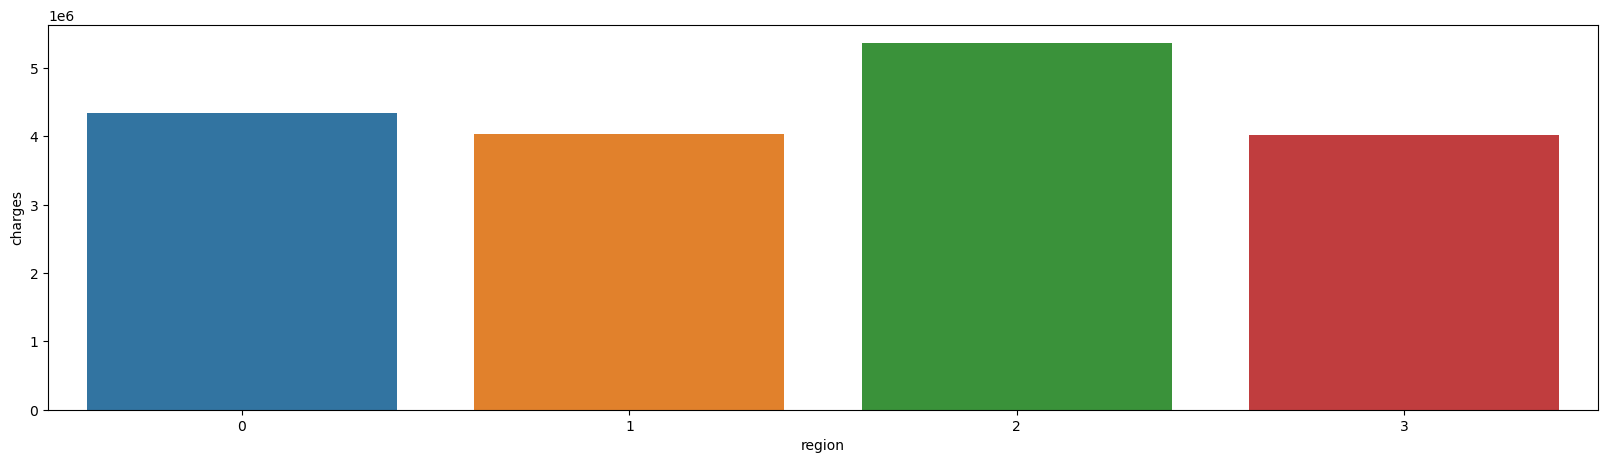

In [49]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)

The Southeast region exhibits the highest charges, while the Southwest region has the lowest charges. Considering this, let's examine how charges vary by region while considering other factors like number of children, gender, and smoking behavior.

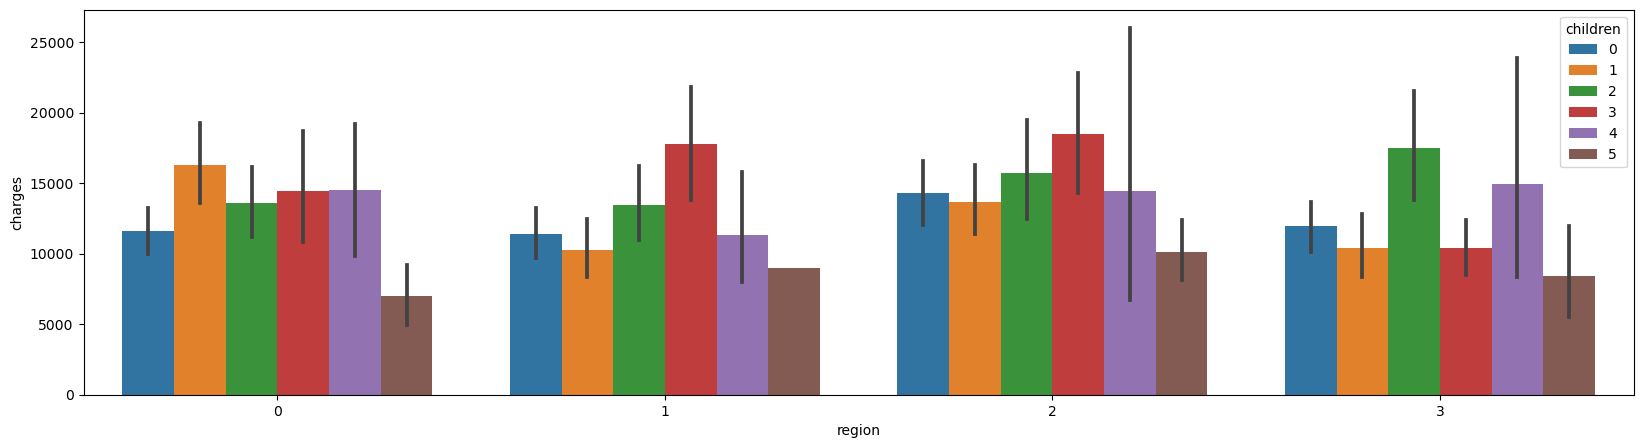

In [50]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

There appears to be no statistical difference in how the number of children influences charges within a specific region.

<Axes: xlabel='region', ylabel='charges'>

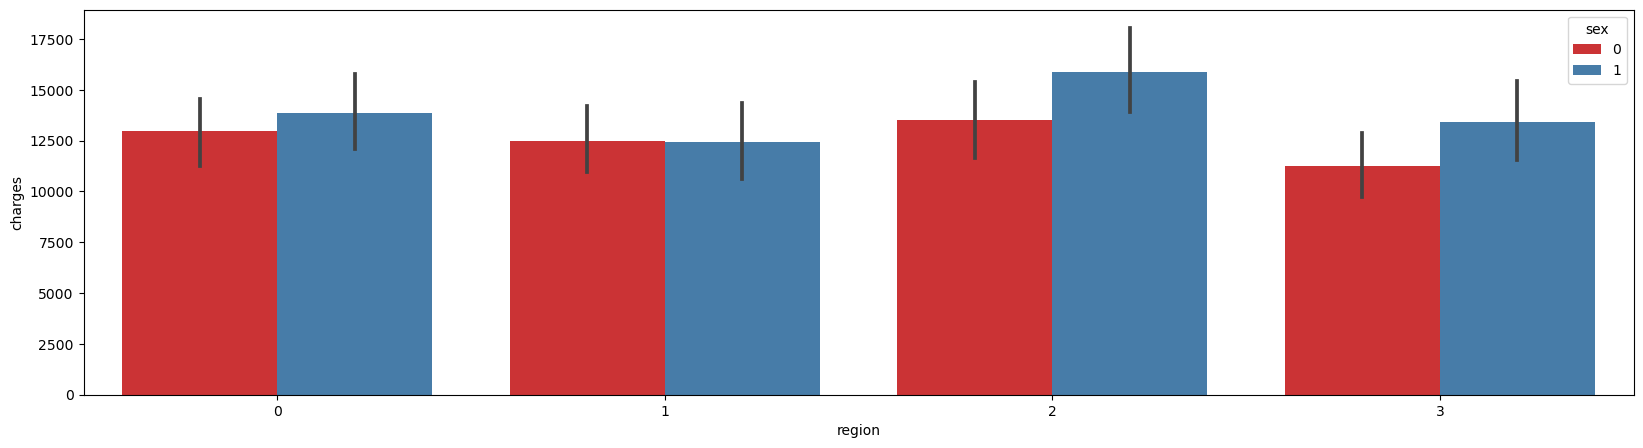

In [51]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'Set1')


Similar to the previous graph, there doesn't appear to be a statistical difference in how gender within a specific region affects charges.

age	sex	bmi	children	smoker	region	charges

<Axes: xlabel='region', ylabel='charges'>

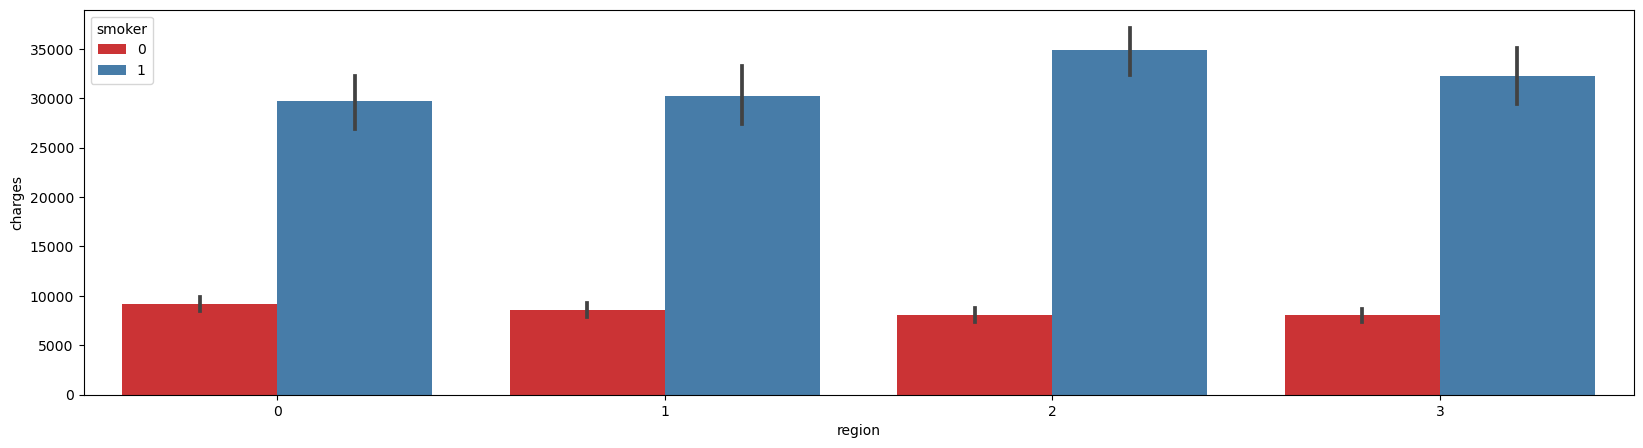

In [52]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Set1')

In contrast to the other factors, there appears to be statistical significance in how smoking behavior within a region affects charges.

These bar charts indicate that smoking behavior by region significantly influences medical charges. Therefore, let's examine the correlation between non-categorical variables (age, BMI, and number of children) and medical charges, with consideration for smoking behavior.

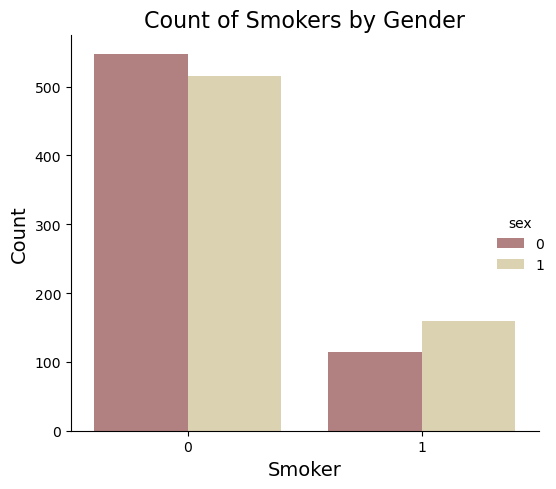

In [53]:
# Create a catplot
sns.catplot(x="smoker", kind="count", hue="sex", palette="pink", data=df)

# Customize labels and title
plt.xlabel("Smoker", size=14)
plt.ylabel("Count", size=14)
plt.title("Count of Smokers by Gender", size=16)

# Show the plot
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Age vs Medical Charges')

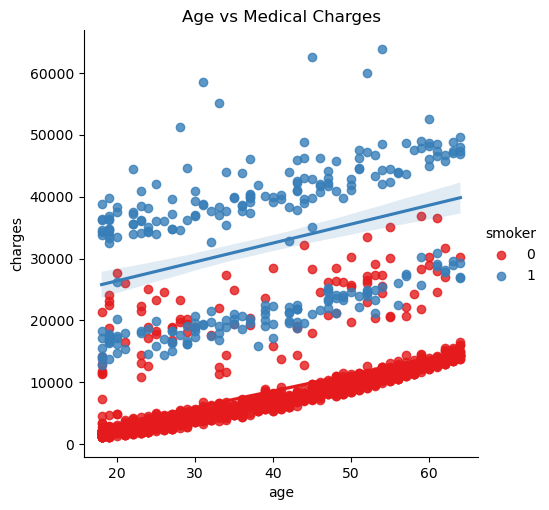

In [54]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')


Text(0.5, 1.0, 'BMI vs Medical Charges')

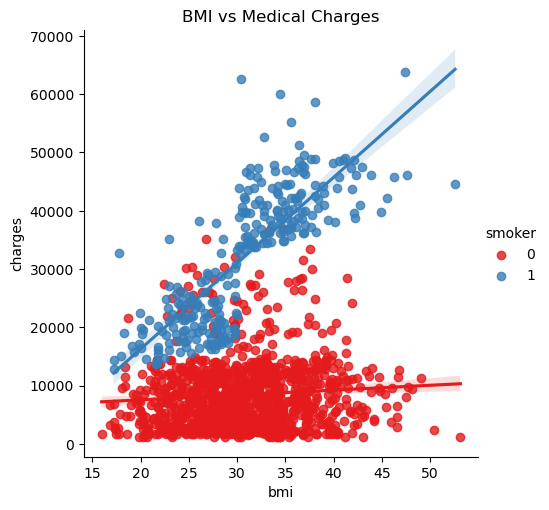

In [55]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')


Text(0.5, 1.0, 'Number of children vs Medical Charges')

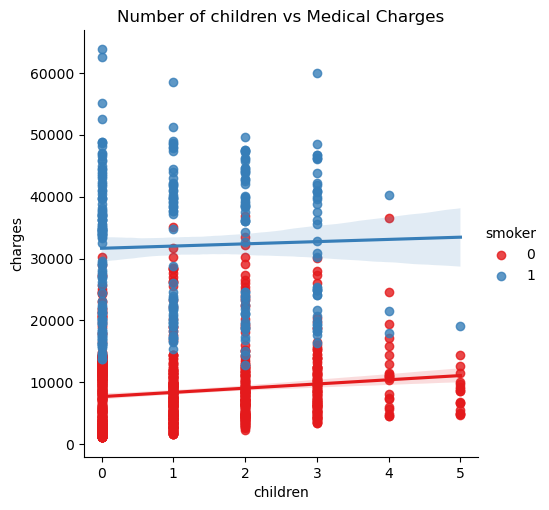

In [56]:
ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

From the analysis, it's evident that smoking significantly impacts medical costs. Moreover, smoking combined with increases in other factors like age, BMI, and number of children further accentuates and raises medical costs attributed to smoking.

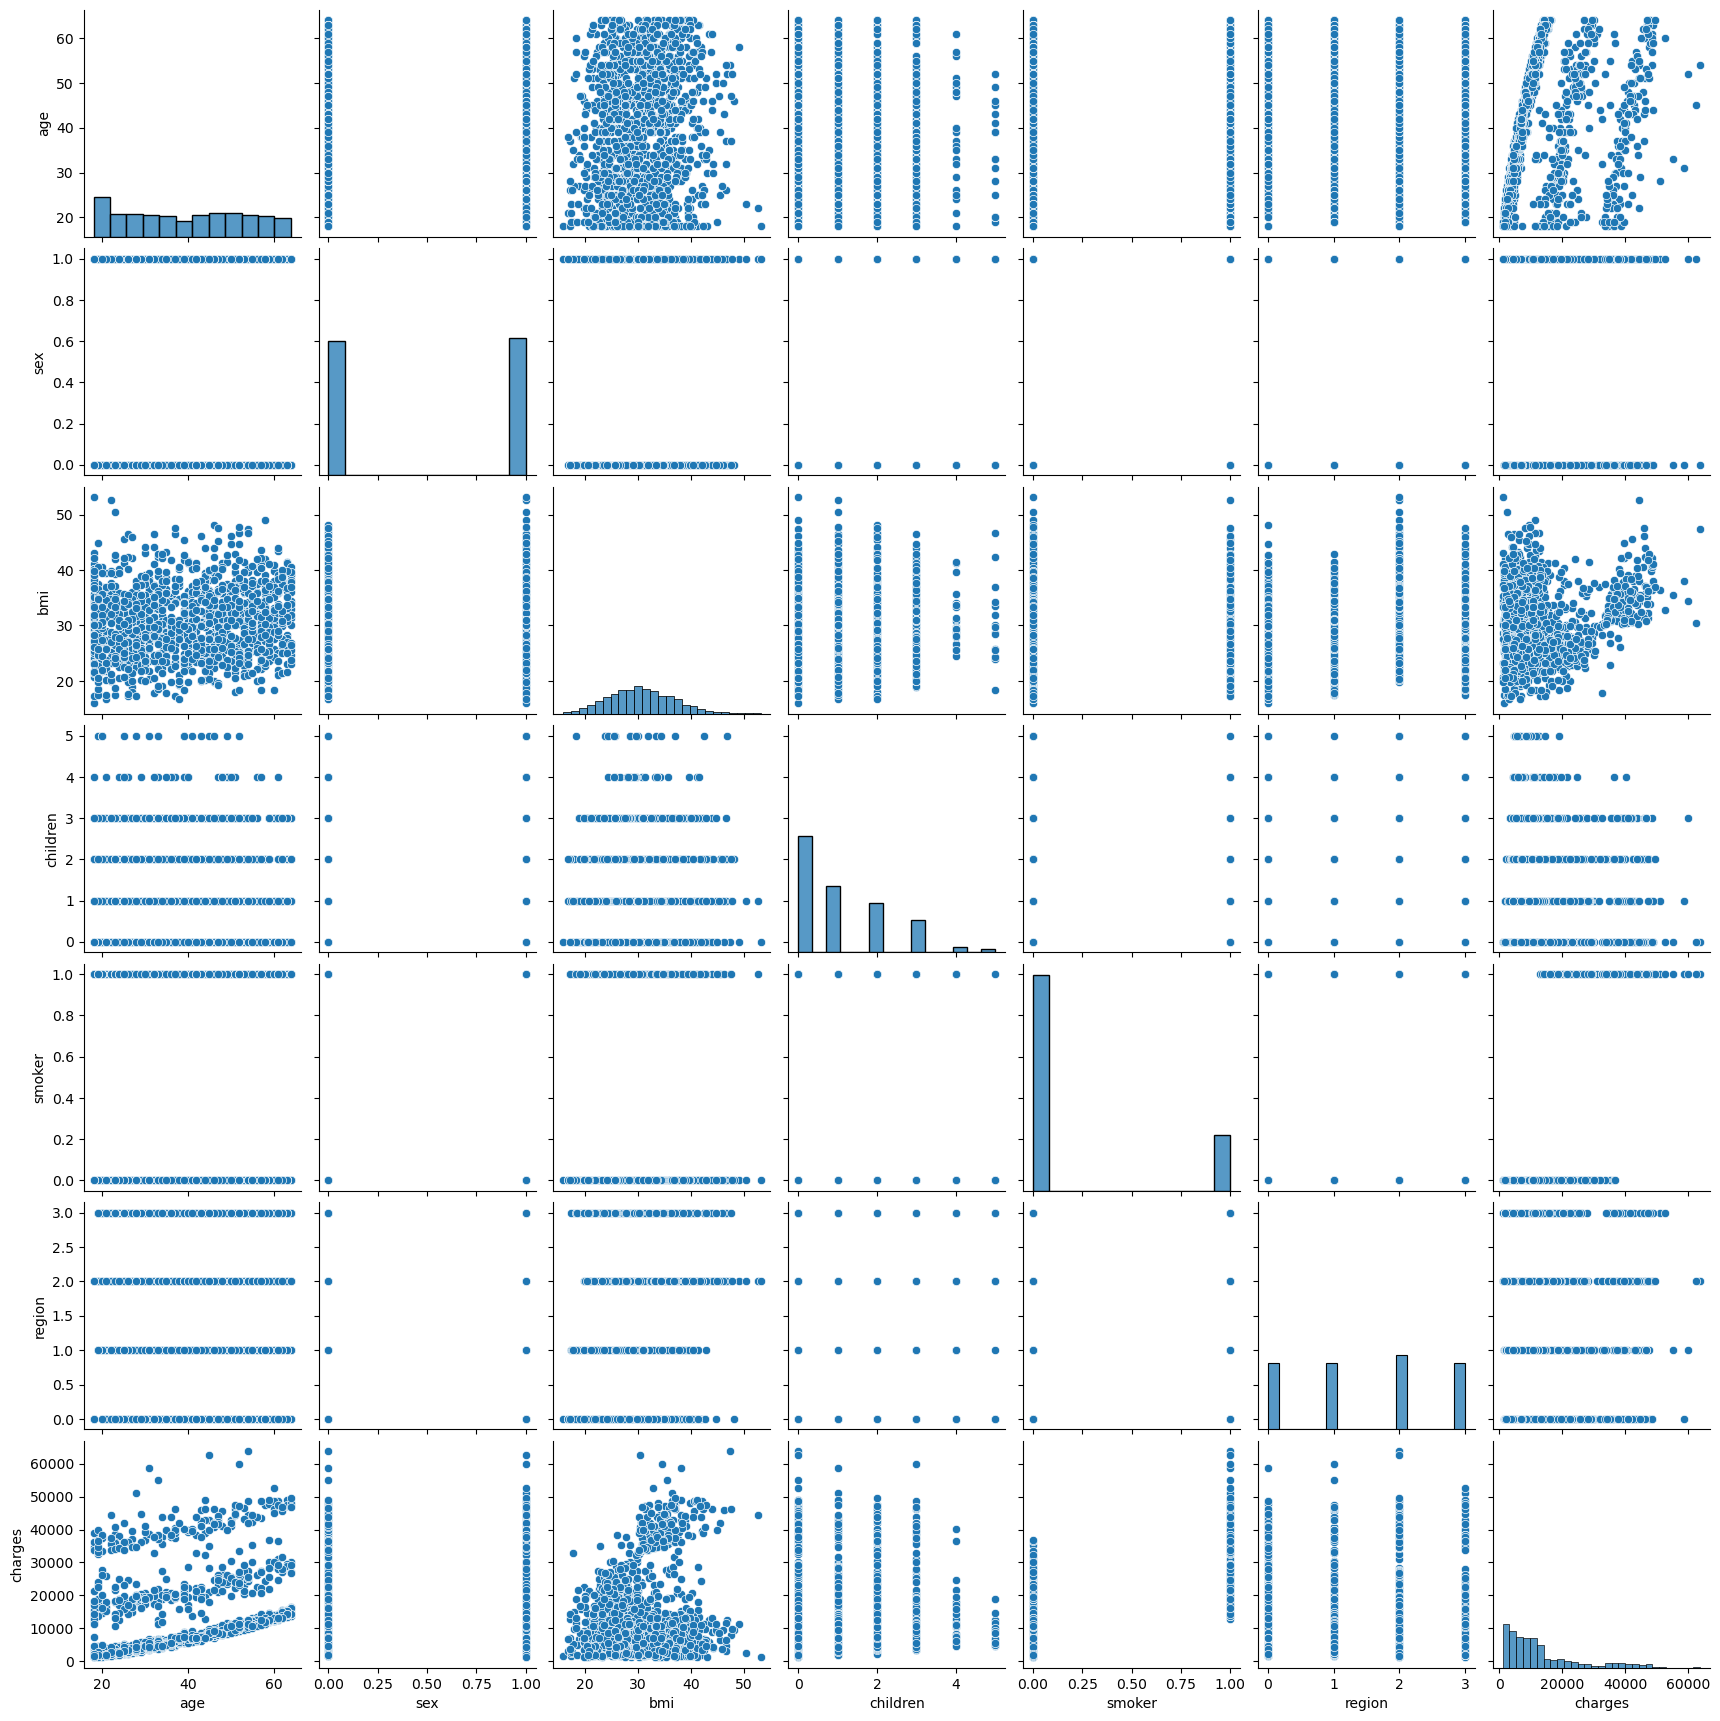

In [57]:
sns.pairplot(df)

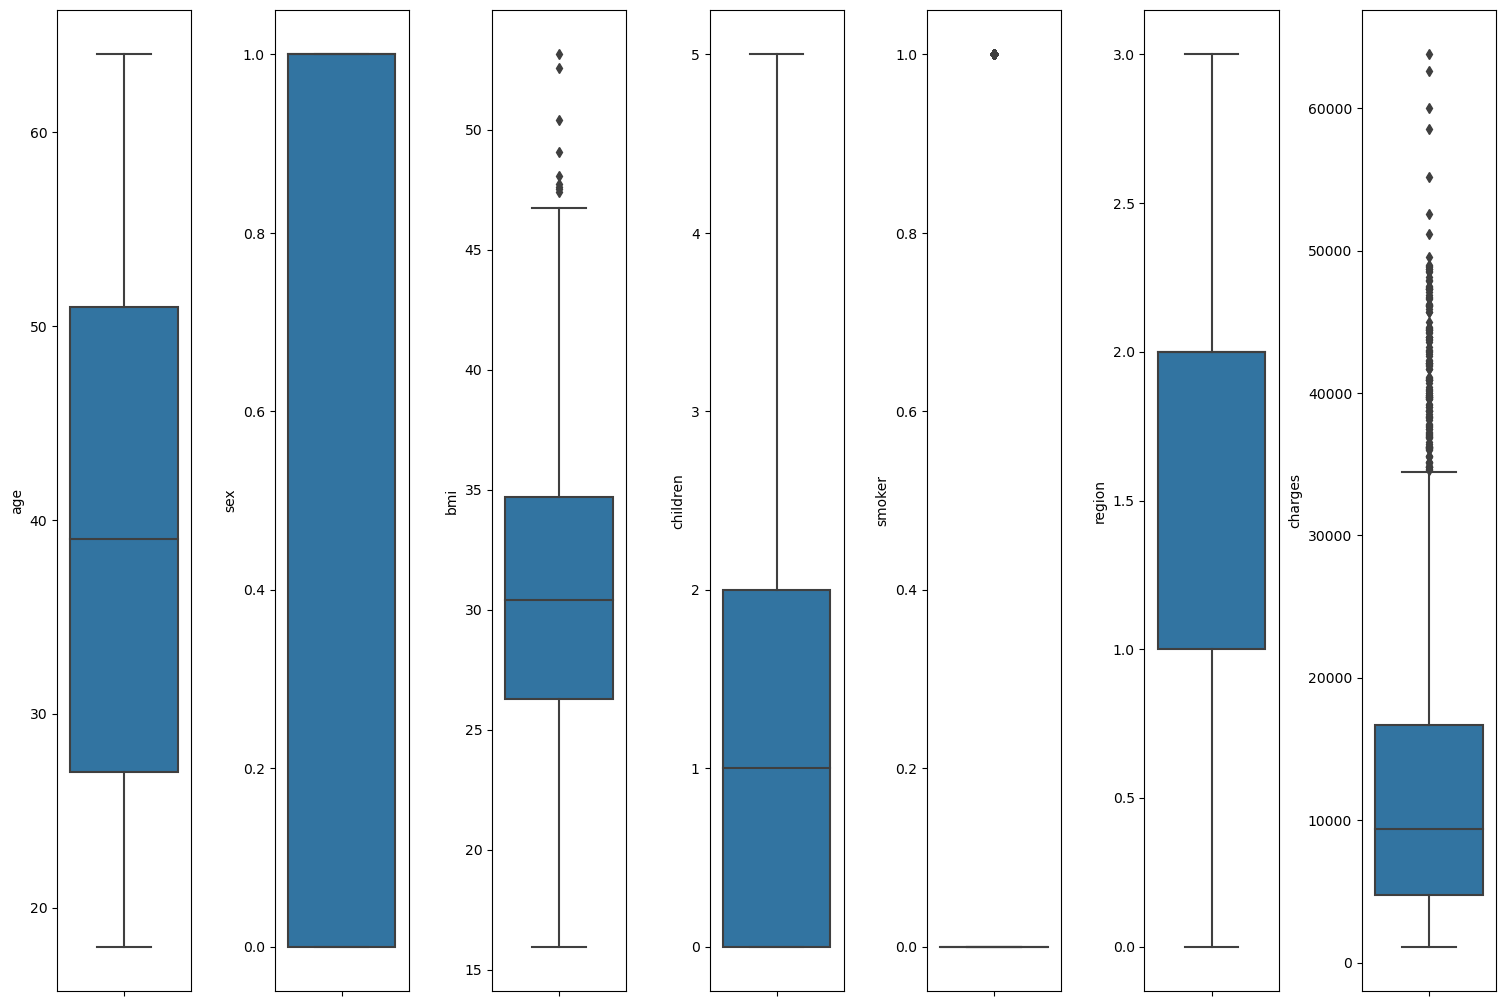

In [58]:
fig, ax = plt.subplots(ncols=7, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

# Correlation using a Heatmap

1. Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

2. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

<Axes: >

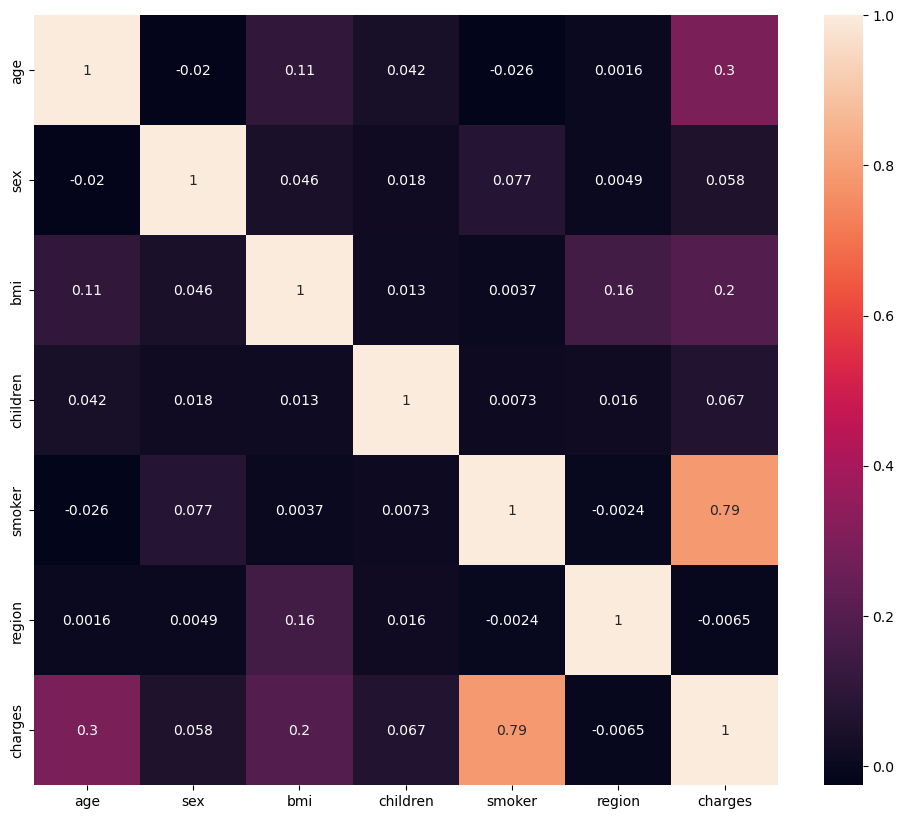

In [59]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)

This indicates that smoking behavior, followed by age and BMI, are highly correlated with medical charges.

# Scatter plot

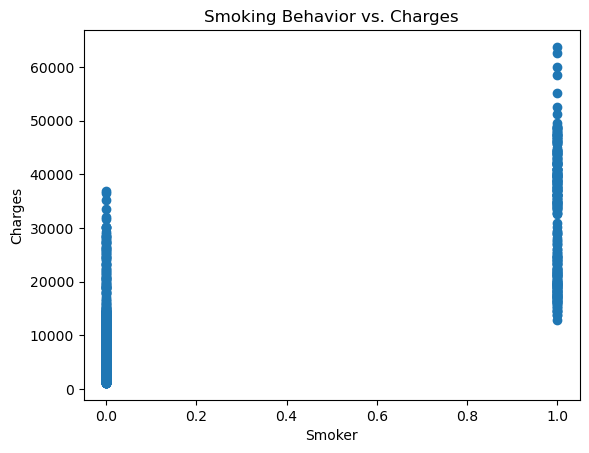

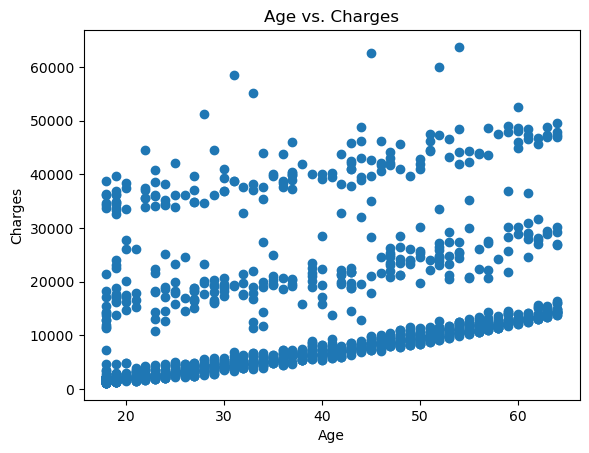

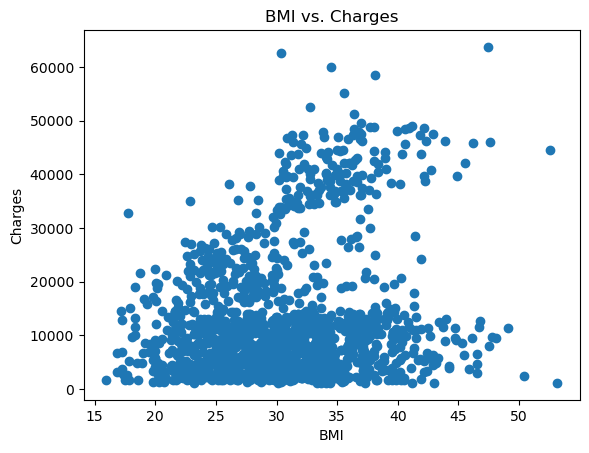

In [60]:
# Scatter plot for smoking behavior vs. charges
plt.scatter(df['smoker'], df['charges'])
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoking Behavior vs. Charges')
plt.show()

# Scatter plot for age vs. charges
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show()

# Scatter plot for BMI vs. charges
plt.scatter(df['bmi'], df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges')
plt.show()


# Outlier removal

In [61]:
df.shape

(1337, 7)

In [62]:
# Z score method
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Z-score method to remove outliers from our dataset that fall outside the acceptable range of +/-0.5 skewness value.

In [63]:
df.shape

(1308, 7)

After applying the outlier removal technique, let's check the number of rows present in the dataset.

In [64]:
# Percentage of Data Loss

data_loss=(1337-1308)/1337*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

2.169035153328347

After removing the outliers, we're assessing the data loss percentage by comparing the number of rows in our original dataset with the new dataset after outlier removal. The data loss percentage should not exceed 10 percent.

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables.

In [65]:
X = df.drop('charges', axis=1)
Y = df['charges']

In [66]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [67]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1308, dtype: float64

# Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,age,sex,bmi,children,smoker,region
0,-1.440754,-1.004598,-0.449186,-0.930279,1.983897,1.351994
1,-1.511806,0.995423,0.533188,-0.040802,-0.504058,0.446975
2,-0.801288,0.995423,0.404324,1.738153,-0.504058,0.446975
3,-0.446029,0.995423,-1.318596,-0.930279,-0.504058,-0.458045
4,-0.517081,0.995423,-0.285179,-0.930279,-0.504058,-0.458045
...,...,...,...,...,...,...
1303,0.761851,0.995423,0.064594,1.738153,-0.504058,-0.458045
1304,-1.511806,-1.004598,0.223581,-0.930279,-0.504058,-1.363065
1305,-1.511806,-1.004598,1.048641,-0.930279,-0.504058,0.446975
1306,-1.298651,-1.004598,-0.800632,-0.930279,-0.504058,1.351994


To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

# Creating the training and testing data sets

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

# Model Building

In [70]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
print()
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [71]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

Model Name: LinearRegression()
R-squared Score: 0.7891497688487265
R-squared Score on training data: 74.1864172821264
Mean Absolute Error: 4128.019955166388
Mean Squared Error: 32558855.69549682
Root Mean Squared Error: 5706.036776563644

Cross Validation Score: [0.7633674  0.71275448 0.77995497 0.73048268 0.7662308 ]
Cross Validation Score Mean: 0.7505580662519831
R-squared Score - Cross Validation Score is 3.8591702596743382


In [72]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

Model Name: Ridge()
R-squared Score: 0.7890785415629319
R-squared Score on training data: 74.18634585661056
Mean Absolute Error: 4129.48127653744
Mean Squared Error: 32569854.397784717
Root Mean Squared Error: 5707.000472909102

Cross Validation Score: [0.76334761 0.7128113  0.77986041 0.73055154 0.76623026]
Cross Validation Score Mean: 0.7505602229685031
R-squared Score - Cross Validation Score is 3.851831859442878


In [73]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

Model Name: Lasso()
R-squared Score: 0.7891534201107092
R-squared Score on training data: 74.1864127456614
Mean Absolute Error: 4127.763466949765
Mean Squared Error: 32558291.878652252
Root Mean Squared Error: 5705.987371056148

Cross Validation Score: [0.76336907 0.71277852 0.77993984 0.73048045 0.76623614]
Cross Validation Score Mean: 0.7505608012189574
R-squared Score - Cross Validation Score is 3.8592618891751806


In [74]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

Model Name: DecisionTreeRegressor()
R-squared Score: 0.72493321987759
R-squared Score on training data: 99.86874205742183
Mean Absolute Error: 3171.709200969465
Mean Squared Error: 42474981.18323217
Root Mean Squared Error: 6517.28326707012

Cross Validation Score: [0.7764346  0.6487511  0.63696825 0.72579606 0.67453357]
Cross Validation Score Mean: 0.6924967157154758
R-squared Score - Cross Validation Score is 3.243650416211419


In [75]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

Model Name: RandomForestRegressor()
R-squared Score: 0.8606473890254659
R-squared Score on training data: 97.58168968867538
Mean Absolute Error: 2780.08116036454
Mean Squared Error: 21518409.189010546
Root Mean Squared Error: 4638.793936898959

Cross Validation Score: [0.8509688  0.78266564 0.8512374  0.83389107 0.85558644]
Cross Validation Score Mean: 0.8348698710314564
R-squared Score - Cross Validation Score is 2.5777517994009513


In [76]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

Model Name: ExtraTreesRegressor()
R-squared Score: 0.824713801990735
R-squared Score on training data: 99.86874205742183
Mean Absolute Error: 2937.1443400694648
Mean Squared Error: 27067165.140081808
Root Mean Squared Error: 5202.611376999228

Cross Validation Score: [0.83251539 0.75474385 0.83992505 0.81202076 0.83857021]
Cross Validation Score Mean: 0.8155550523167386
R-squared Score - Cross Validation Score is 0.9158749673996325


In [77]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

Model Name: AdaBoostRegressor()
R-squared Score: 0.8298728355190532
R-squared Score on training data: 79.98399430776699
Mean Absolute Error: 4217.911609926643
Mean Squared Error: 26270522.768576723
Root Mean Squared Error: 5125.477808807363

Cross Validation Score: [0.84739931 0.79402285 0.81136101 0.81013393 0.84645096]
Cross Validation Score Mean: 0.8218736123785113
R-squared Score - Cross Validation Score is 0.7999223140541911


In [78]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

Model Name: GradientBoostingRegressor()
R-squared Score: 0.8812233402468923
R-squared Score on training data: 89.65212829462902
Mean Absolute Error: 2560.315213457346
Mean Squared Error: 18341132.963330865
Root Mean Squared Error: 4282.654896595202

Cross Validation Score: [0.87659267 0.80746365 0.87926802 0.84913445 0.86369415]
Cross Validation Score Mean: 0.8552305876314541
R-squared Score - Cross Validation Score is 2.599275261543821


In [79]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R-squared Score: 0.8546708192589443
R-squared Score on training data: 99.52658486871363
Mean Absolute Error: 2892.351538009214
Mean Squared Error: 22441293.036563165
Root Mean Squared Error: 4737.2241910810135

Cross Validation Score: [0.823

In [80]:
# Model Name: LinearRegression
R-squared Score: 0.7891497688487265
R-squared Score on training data: 74.1864172821264
Mean Absolute Error: 4128.019955166388
Mean Squared Error: 32558855.69549682
Root Mean Squared Error: 5706.036776563644

Cross Validation Score: [0.7633674  0.71275448 0.77995497 0.73048268 0.7662308 ]
Cross Validation Score Mean: 0.7505580662519831
R-squared Score - Cross Validation Score is 3.8591702596743382

# Model Name: Ridge()
R-squared Score: 0.7890785415629319
R-squared Score on training data: 74.18634585661056
Mean Absolute Error: 4129.48127653744
Mean Squared Error: 32569854.397784717
Root Mean Squared Error: 5707.000472909102

Cross Validation Score: [0.76334761 0.7128113  0.77986041 0.73055154 0.76623026]
Cross Validation Score Mean: 0.7505602229685031
R-squared Score - Cross Validation Score is 3.851831859442878

# Model Name: Lasso()
R-squared Score: 0.7891534201107092
R-squared Score on training data: 74.1864127456614
Mean Absolute Error: 4127.763466949765
Mean Squared Error: 32558291.878652252
Root Mean Squared Error: 5705.987371056148

Cross Validation Score: [0.76336907 0.71277852 0.77993984 0.73048045 0.76623614]
Cross Validation Score Mean: 0.7505608012189574
R-squared Score - Cross Validation Score is 3.8592618891751806

# Model Name: DecisionTreeRegressor()
R-squared Score: 0.7172435510219104
R-squared Score on training data: 99.86874205742183
Mean Absolute Error: 3256.5159267328245
Mean Squared Error: 43662396.616695
Root Mean Squared Error: 6607.7527660086525

Cross Validation Score: [0.78490262 0.64064873 0.60957974 0.73492677 0.63216024]
Cross Validation Score Mean: 0.6804436204132646
R-squared Score - Cross Validation Score is 3.6799930608645837

# Model Name: RandomForestRegressor()
R-squared Score: 0.8635845016997787
R-squared Score on training data: 97.44392240350169
Mean Absolute Error: 2737.9301308859726
Mean Squared Error: 21064869.123143792
Root Mean Squared Error: 4589.648039135876

Cross Validation Score: [0.85408996 0.7803202  0.854635   0.8331297  0.85396849]
Cross Validation Score Mean: 0.8352286673286136
R-squared Score - Cross Validation Score is 2.835583437116518

# Model Name: ExtraTreesRegressor()
R-squared Score: 0.8298509580144424
R-squared Score on training data: 99.86874205742183
Mean Absolute Error: 2857.2790882517165
Mean Squared Error: 26273901.026744675
Root Mean Squared Error: 5125.807353651196

Cross Validation Score: [0.83497828 0.75565434 0.83243425 0.8088363  0.84574556]
Cross Validation Score Mean: 0.8155297442442686
R-squared Score - Cross Validation Score is 1.4321213770173813

# Model Name: AdaBoostRegressor()
R-squared Score: 0.8682032188864998
R-squared Score on training data: 83.81631139451106
Mean Absolute Error: 3547.917739252153
Mean Squared Error: 20351660.76876039
Root Mean Squared Error: 4511.281499614094

Cross Validation Score: [0.84196212 0.78349452 0.83999083 0.81041941 0.85136826]
Cross Validation Score Mean: 0.8254470284181536
R-squared Score - Cross Validation Score is 4.275619046834612

# Model Name: GradientBoostingRegressor()
R-squared Score: 0.8812233402468924
R-squared Score on training data: 89.65212829462902
Mean Absolute Error: 2560.315213457346
Mean Squared Error: 18341132.96333086
Root Mean Squared Error: 4282.654896595202

Cross Validation Score: [0.87659267 0.80510939 0.87923078 0.84914276 0.86369415]
Cross Validation Score Mean: 0.8547539493242005
R-squared Score - Cross Validation Score is 2.646939092269196


# XGBRegressor
R-squared Score: 0.8546708192589443
R-squared Score on training data: 99.52658486871363
Mean Absolute Error: 2892.351538009214
Mean Squared Error: 22441293.036563165
Root Mean Squared Error: 4737.2241910810135

Cross Validation Score: [0.82392657 0.74715737 0.82026456 0.81084306 0.81777512]
Cross Validation Score Mean: 0.8039933345680096
R-squared Score - Cross Validation Score is 5.06774846909347



SyntaxError: invalid syntax (1737640505.py, line 2)


1. **Linear Regression**:
   - R-squared Score: 0.789
   - Cross Validation Score Mean: 0.751
   - Difference: 3.859

2. **Ridge Regression**:
   - R-squared Score: 0.789
   - Cross Validation Score Mean: 0.751
   - Difference: 3.852

3. **Lasso Regression**:
   - R-squared Score: 0.789
   - Cross Validation Score Mean: 0.751
   - Difference: 3.859

4. **Decision Tree Regressor**:
   - R-squared Score: 0.717
   - Cross Validation Score Mean: 0.680
   - Difference: 3.680

5. **Random Forest Regressor**:
   - R-squared Score: 0.864
   - Cross Validation Score Mean: 0.835
   - Difference: 2.836

6. **Extra Trees Regressor**:
   - R-squared Score: 0.830
   - Cross Validation Score Mean: 0.816
   - Difference: 1.432

7. **AdaBoost Regressor**:
   - R-squared Score: 0.868
   - Cross Validation Score Mean: 0.825
   - Difference: 4.276

8. **Gradient Boosting Regressor**:
   - R-squared Score: 0.881
   - Cross Validation Score Mean: 0.855
   - Difference: 2.647

9. **XGB Regressor**:
   - R-squared Score: 0.855
   - Cross Validation Score Mean: 0.804
   - Difference: 5.068



the Extra Trees Regressor demonstrates a high R-squared score on the test data and a relatively small difference between the R-squared score and cross-validation score, indicating strong predictive accuracy and generalization ability. Therefore, it stands out as one of the best models for the regression .

# Hyper parameter tuning on the best ML Model

In [81]:
# Choosing the Extra Trees Regressor as best model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [82]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ETR, param_grid=param_grid, cv=5)

In [83]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [84]:
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [90]:
final_model_1 = ExtraTreesRegressor(max_depth=10,
                                    max_features='auto',
                                    min_samples_leaf=2,
                                    min_samples_split=10,
                                    n_estimators=50,
                                    random_state=1000)

In [91]:
final_model_1.fit(X_train, Y_train)

ExtraTreesRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                    min_samples_split=10, n_estimators=50, random_state=1000)

In [92]:
pred = final_model_1.predict(X_test)

In [93]:
mse = mean_squared_error(Y_test, pred)

In [94]:
print("Mean Squared Error:", mse)

Mean Squared Error: 18336524.070461717


# Saving the model

In [95]:
import joblib

filename = "FinalModel_3.pkl"
joblib.dump(final_model_1, filename)

['FinalModel_3.pkl']

In [96]:
model=joblib.load("FinalModel_3.pkl")

prediction=model.predict(X_test)
prediction

array([22173.11149044, 19008.83216183,  6006.76995122, 10964.67038268,
       11458.3312456 ,  5244.85688719,  4291.16444303,  1954.55143959,
        5612.43415835, 28702.17490052, 42887.42607829,  9369.59969783,
        6615.84261422, 12107.00130161, 43923.86345657,  6198.44303656,
        6102.50403677,  3689.30471472,  5238.85701316, 14300.14125866,
        1374.05402199,  8580.91398009,  3499.57925783, 34959.57900252,
        8657.96521048,  7770.12527802, 11864.37038346, 15881.77307893,
        5884.40820052,  5492.87262147,  6480.60752704,  6250.82341653,
       11528.26357749, 10544.87575869, 11006.17107217, 41231.3270633 ,
       47432.19477063,  7676.03055648,  7709.59786119, 15295.63702013,
       12315.34123757,  6320.13566773,  5482.03789004,  7297.90996139,
       44524.85479145,  7042.52406907,  4533.3281704 ,  5500.29440661,
       12937.82506033, 12580.62355083, 12751.98512924, 10081.11990083,
        6280.29635212, 45018.31912533,  6738.24812632, 16758.30022317,
      

In [97]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

,Predicted,Original
0,22173.111490,21472.4788
1,19008.832162,14418.2804
2,6006.769951,5972.3780
3,10964.670383,4433.9159
4,11458.331246,9583.8933


In [98]:
df.tail()

,Predicted,Original
257,2141.051874,2138.07070
258,9548.875514,8615.30000
259,23758.971423,23967.38305
260,3109.368343,2494.02200
261,6521.088572,5425.02335


In [99]:
df[200:220]

,Predicted,Original
200,6160.569698,5910.94400
201,47635.706525,48970.24760
202,8110.894776,7325.04820
203,9888.001382,8516.82900
204,6111.079253,3044.21330
205,10140.691694,8334.45755
206,3133.320673,11272.33139
207,7437.275359,6600.20595
208,5914.877054,4350.51440
209,28498.511681,26926.51440
